# Task #2 To Explore: Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
Data can be found at http://bit.ly/w data

# Simple Linear Regression using Scikit Learn
What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading Data from the web

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Checking Null Values

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Null Values found

# Plot to see the relationship

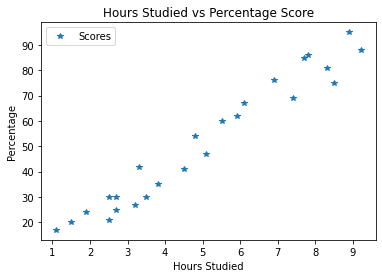

In [5]:
data.plot(x='Hours',y='Scores',style = '*')
plt.title('Hours Studied vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

From above graph we can see linear relation between variables

# Prepairing the data in x and y

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

# Splitting the data into 80% as train and 20% as test data

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
reg = linear_model.LinearRegression()

# Training the Data

In [8]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the regression line for the test data
y = m*x + c

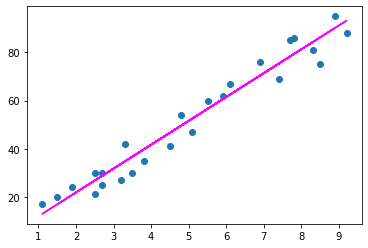

In [9]:
line = reg.coef_*X + reg.intercept_
#Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line, color = 'magenta')
plt.show()

# Finding Intercept and Slope of the best fit line


In [10]:
print('Intercept:{}'.format(reg.intercept_))

Intercept:2.018160041434669


In [11]:
print('Slope:{}'.format(reg.coef_))

Slope:[9.91065648]


# Predicting Result

In [12]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
print(y_test)

[20 27 69 30 62]


In [14]:
y_pred = reg.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Plotting Bar Graph to see actual and predicted values

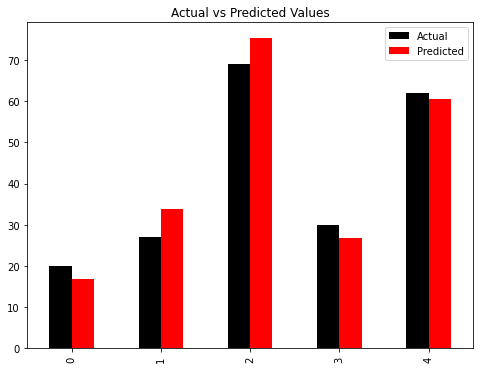

In [16]:
df.plot(kind = 'bar', figsize = (8,6), title = 'Actual vs Predicted Values',color=['black','red'])
plt.show()

# Testing Data for given Hour

In [17]:
hour = float(input())
hours = np.array(hour)
hours = hours.reshape(-1,1)
pred = reg.predict(hours)
print('No. of Hours = {}'.format(*hours))
print('Predicted Score = {}'.format(pred[0]))

9.5
No. of Hours = [9.5]
Predicted Score = 96.16939660753593


## Evaluating the Model
Calculating Mean Absolute Error(MAE), Mean Squared Error(MSE) and r2 score. 

In [18]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('r2_score:',metrics.r2_score(y_test,y_pred))

MAE: 4.18385989900298
MSE: 21.598769307217413
r2_score: 0.9454906892105355
